# COMP3850 - FX analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#for augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
import math
######## 
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#import datetime

In [27]:
len(str(22))

2

## Import the Data

In [2]:
##AUD-USD DATA
data_list =[]
#range(1,26)
#5,12,19,26,
for n in range(1, 25):
    if(len(str(n)) == 1):
        if(n == 5):
            dat = pd.read_csv(f"FX/202006/bar_Forex_AUDUSD-2020060{n}T000000_2020060{n}T205959.csv")
        elif(n not in [6,7]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_AUDUSD-2020060{n}T000000_2020060{n}T235959.csv")
        else:
            pass
    data_list.append(dat)
    if(n in [12,19,26]):
        dat = pd.read_csv(f"FX/202006/bar_Forex_AUDUSD-202006{n}T000000_202006{n}T205959.csv")
    elif(len(str(n)) == 2):
        if(n not in [13,14,20,21,27,28]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_AUDUSD-202006{n}T000000_202006{n}T235959.csv")
dfaudusd = pd.concat(data_list)
dfaudusd.head()

##EUR-AUD DATA
data_list =[]
#range(1,26)
#5,12,19,26,
for n in range(1, 25):
    if(len(str(n)) == 1):
        if(n == 5):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURAUD-2020060{n}T000000_2020060{n}T205959.csv")
        elif(n not in [6,7]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURAUD-2020060{n}T000000_2020060{n}T235959.csv")
        else:
            pass
    data_list.append(dat)
    if(n in [12,19,26]):
        dat = pd.read_csv(f"FX/202006/bar_Forex_EURAUD-202006{n}T000000_202006{n}T205959.csv")
    elif(len(str(n)) == 2):
        if(n not in [13,14,20,21,27,28]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURAUD-202006{n}T000000_202006{n}T235959.csv")
dfeuraud = pd.concat(data_list)
dfeuraud.head()

##EUR-GBP DATA
data_list =[]
#range(1,26)
#5,12,19,26,
for n in range(1, 25):
    if(len(str(n)) == 1):
        if(n == 5):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURGBP-2020060{n}T000000_2020060{n}T205959.csv")
        elif(n not in [6,7]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURGBP-2020060{n}T000000_2020060{n}T235959.csv")
        else:
            pass
    data_list.append(dat)
    if(n in [12,19,26]):
        dat = pd.read_csv(f"FX/202006/bar_Forex_EURGBP-202006{n}T000000_202006{n}T205959.csv")
    elif(len(str(n)) == 2):
        if(n not in [13,14,20,21,27,28]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURGBP-202006{n}T000000_202006{n}T235959.csv")
dfeurgbp = pd.concat(data_list)
dfeurgbp.head()

##EUR-USD DATA
data_list =[]
#range(1,26)
#5,12,19,26,
for n in range(1, 25):
    if(len(str(n)) == 1):
        if(n == 5):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURUSD-2020060{n}T000000_2020060{n}T205959.csv")
        elif(n not in [6,7]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURUSD-2020060{n}T000000_2020060{n}T235959.csv")
        else:
            pass
    data_list.append(dat)
    if(n in [12,19,26]):
        dat = pd.read_csv(f"FX/202006/bar_Forex_EURUSD-202006{n}T000000_202006{n}T205959.csv")
    elif(len(str(n)) == 2):
        if(n not in [13,14,20,21,27,28]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_EURUSD-202006{n}T000000_202006{n}T235959.csv")
dfeurusd = pd.concat(data_list)
dfeurusd.head()

##GBP-USD DATA
data_list =[]
#range(1,26)
#5,12,19,26,
for n in range(1, 25):
    if(len(str(n)) == 1):
        if(n == 5):
            dat = pd.read_csv(f"FX/202006/bar_Forex_GBPUSD-2020060{n}T000000_2020060{n}T205959.csv")
        elif(n not in [6,7]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_GBPUSD-2020060{n}T000000_2020060{n}T235959.csv")
        else:
            pass
    data_list.append(dat)
    if(n in [12,19,26]):
        dat = pd.read_csv(f"FX/202006/bar_Forex_GBPUSD-202006{n}T000000_202006{n}T205959.csv")
    elif(len(str(n)) == 2):
        if(n not in [13,14,20,21,27,28]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_GBPUSD-202006{n}T000000_202006{n}T235959.csv")
dfgbpusd = pd.concat(data_list)
dfgbpusd.head()


,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,1.23448,1.23456,1.23448,1.23449,-1,-1.0,-1,1.23457,1.23461,1.23457,1.23457,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,1.23449,1.23454,1.23449,1.23454,-1,-1.0,-1,1.23457,1.23461,1.23457,1.23461,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,1.23454,1.23454,1.23454,1.23454,-1,-1.0,-1,1.23461,1.23461,1.23461,1.23461,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,1.23454,1.23454,1.23452,1.23452,-1,-1.0,-1,1.23461,1.23461,1.23460,1.23460,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,1.23452,1.23452,1.23452,1.23452,-1,-1.0,-1,1.23460,1.23461,1.23460,1.23460,-1,-1.0,-1


In [3]:
dfaudusd.shape
dfeuraud.shape
dfeurgbp.shape
dfeurusd.shape
dfgbpusd.shape

(1962900, 15)

In [113]:
dfaudusd.info()
dfeuraud.info()
dfeurgbp.info()
dfeurusd.info()
dfgbpusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962900 entries, 0 to 85499
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   bid_open      float64
 2   bid_high      float64
 3   bid_low       float64
 4   bid_close     float64
 5   bid_volume    int64  
 6   bid_average   float64
 7   bid_barCount  int64  
 8   ask_open      float64
 9   ask_high      float64
 10  ask_low       float64
 11  ask_close     float64
 12  ask_volume    int64  
 13  ask_average   float64
 14  ask_barCount  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 239.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962900 entries, 0 to 85499
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   bid_open      float64
 2   bid_high      float64
 3   bid_low       float64
 4   bid_close     float64
 5   bid_volume    int64  
 6   bid_average   float64
 7   bid_ba

In [114]:
dfaudusd.describe()
dfeuraud.describe()
dfeurgbp.describe()
dfeurusd.describe()
dfgbpusd.describe()

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,1.962900e+06,1.962900e+06,1.962900e+06,1.962900e+06,1962900.0,1962900.0,1962900.0,1.962900e+06,1.962900e+06,1.962900e+06,1.962900e+06,1962900.0,1962900.0,1962900.0
mean,1.256677e+00,1.256688e+00,1.256668e+00,1.256677e+00,-1.0,-1.0,-1.0,1.256733e+00,1.256744e+00,1.256723e+00,1.256733e+00,-1.0,-1.0,-1.0
std,1.107289e-02,1.107356e-02,1.107232e-02,1.107289e-02,0.0,0.0,0.0,1.107259e-02,1.107314e-02,1.107201e-02,1.107259e-02,0.0,0.0,0.0
min,1.233520e+00,1.233520e+00,1.233520e+00,1.233520e+00,-1.0,-1.0,-1.0,1.233550e+00,1.233550e+00,1.233550e+00,1.233550e+00,-1.0,-1.0,-1.0
25%,1.248660e+00,1.248660e+00,1.248650e+00,1.248660e+00,-1.0,-1.0,-1.0,1.248720e+00,1.248730e+00,1.248710e+00,1.248720e+00,-1.0,-1.0,-1.0
50%,1.257150e+00,1.257170e+00,1.257150e+00,1.257150e+00,-1.0,-1.0,-1.0,1.257220e+00,1.257230e+00,1.257210e+00,1.257220e+00,-1.0,-1.0,-1.0
75%,1.265480e+00,1.265490e+00,1.265460e+00,1.265480e+00,-1.0,-1.0,-1.0,1.265520e+00,1.265540e+00,1.265510e+00,1.265520e+00,-1.0,-1.0,-1.0
max,1.281320e+00,1.281340e+00,1.281200e+00,1.281320e+00,-1.0,-1.0,-1.0,1.281340e+00,1.281350e+00,1.281250e+00,1.281340e+00,-1.0,-1.0,-1.0


In [115]:
#checking for nulls and the sum
print(f'Are there any null values ? {dfaudusd.isnull().values.any()}')
print(f'Which fields have null values:\n{dfaudusd.isnull().sum()}')

print(f'Are there any null values ? {dfeuraud.isnull().values.any()}')
print(f'Which fields have null values:\n{dfeuraud.isnull().sum()}')

print(f'Are there any null values ? {dfeurgbp.isnull().values.any()}')
print(f'Which fields have null values:\n{dfeurgbp.isnull().sum()}')

print(f'Are there any null values ? {dfeurusd.isnull().values.any()}')
print(f'Which fields have null values:\n{dfeurusd.isnull().sum()}')

print(f'Are there any null values ? {dfgbpusd.isnull().values.any()}')
print(f'Which fields have null values:\n{dfgbpusd.isnull().sum()}')

Are there any null values ? False
Which fields have null values:
date            0
bid_open        0
bid_high        0
bid_low         0
bid_close       0
bid_volume      0
bid_average     0
bid_barCount    0
ask_open        0
ask_high        0
ask_low         0
ask_close       0
ask_volume      0
ask_average     0
ask_barCount    0
dtype: int64
Are there any null values ? False
Which fields have null values:
date            0
bid_open        0
bid_high        0
bid_low         0
bid_close       0
bid_volume      0
bid_average     0
bid_barCount    0
ask_open        0
ask_high        0
ask_low         0
ask_close       0
ask_volume      0
ask_average     0
ask_barCount    0
dtype: int64
Are there any null values ? False
Which fields have null values:
date            0
bid_open        0
bid_high        0
bid_low         0
bid_close       0
bid_volume      0
bid_average     0
bid_barCount    0
ask_open        0
ask_high        0
ask_low         0
ask_close       0
ask_volume      0
ask_a

Exploratory Data Analysis

In [117]:
dfaudusd[['Date', 'Time']] = dfaudusd['date'].str.split(' ', expand=True)
dfaudusd[['Time', 'Useless']]  = dfaudusd['Time'].str.split('+', expand=True)
dfaudusd.head()

dfeuraud[['Date', 'Time']] = dfeuraud['date'].str.split(' ', expand=True)
dfeuraud[['Time', 'Useless']]  = dfeuraud['Time'].str.split('+', expand=True)
dfeuraud.head()

dfeurgbp[['Date', 'Time']] = dfeurgbp['date'].str.split(' ', expand=True)
dfeurgbp[['Time', 'Useless']]  = dfeurgbp['Time'].str.split('+', expand=True)
dfeurgbp.head()

dfeurusd[['Date', 'Time']] = dfeurusd['date'].str.split(' ', expand=True)
dfeurusd[['Time', 'Useless']]  = dfeurusd['Time'].str.split('+', expand=True)
dfeurusd.head()

dfgbpusd[['Date', 'Time']] = dfgbpusd['date'].str.split(' ', expand=True)
dfgbpusd[['Time', 'Useless']]  = dfgbpusd['Time'].str.split('+', expand=True)
dfgbpusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
0,2020-06-01 00:00:00+00:00,1.23448,1.23456,1.23448,1.23449,-1,-1.0,-1,1.23457,1.23461,1.23457,1.23457,-1,-1.0,-1,2020-06-01,00:00:00,00:00
1,2020-06-01 00:00:01+00:00,1.23449,1.23454,1.23449,1.23454,-1,-1.0,-1,1.23457,1.23461,1.23457,1.23461,-1,-1.0,-1,2020-06-01,00:00:01,00:00
2,2020-06-01 00:00:02+00:00,1.23454,1.23454,1.23454,1.23454,-1,-1.0,-1,1.23461,1.23461,1.23461,1.23461,-1,-1.0,-1,2020-06-01,00:00:02,00:00
3,2020-06-01 00:00:03+00:00,1.23454,1.23454,1.23452,1.23452,-1,-1.0,-1,1.23461,1.23461,1.23460,1.23460,-1,-1.0,-1,2020-06-01,00:00:03,00:00
4,2020-06-01 00:00:04+00:00,1.23452,1.23452,1.23452,1.23452,-1,-1.0,-1,1.23460,1.23461,1.23460,1.23460,-1,-1.0,-1,2020-06-01,00:00:04,00:00


In [118]:
dfaudusd.dtypes
dfeuraud.dtypes
dfeurgbp.dtypes
dfeurusd.dtypes
dfgbpusd.dtypes

date             object
bid_open        float64
bid_high        float64
bid_low         float64
bid_close       float64
bid_volume        int64
bid_average     float64
bid_barCount      int64
ask_open        float64
ask_high        float64
ask_low         float64
ask_close       float64
ask_volume        int64
ask_average     float64
ask_barCount      int64
Date             object
Time             object
Useless          object
dtype: object

In [119]:
dfaudusdse = dfaudusd[(dfaudusd['Time'].str.contains('10:00:00')) | (dfaudusd['Time'].str.contains('16:00:00'))]
dfaudusdse.head()
dfeuraudse = dfeuraud[(dfeuraud['Time'].str.contains('10:00:00')) | (dfeuraud['Time'].str.contains('16:00:00'))]
dfeuraudse.head()
dfeurgbpse = dfeurgbp[(dfeurgbp['Time'].str.contains('10:00:00')) | (dfeurgbp['Time'].str.contains('16:00:00'))]
dfeurgbpse.head()
dfeurusdse = dfeurusd[(dfeurusd['Time'].str.contains('10:00:00')) | (dfeurusd['Time'].str.contains('16:00:00'))]
dfeurusdse.head()
dfgbpusdse = dfgbpusd[(dfgbpusd['Time'].str.contains('10:00:00')) | (dfgbpusd['Time'].str.contains('16:00:00'))]
dfgbpusdse.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount,Date,Time,Useless
36000,2020-06-01 10:00:00+00:00,1.23897,1.23897,1.23889,1.23893,-1,-1.0,-1,1.23902,1.23902,1.23894,1.23896,-1,-1.0,-1,2020-06-01,10:00:00,00:00
57600,2020-06-01 16:00:00+00:00,1.24699,1.24702,1.24699,1.24701,-1,-1.0,-1,1.24704,1.24704,1.24701,1.24703,-1,-1.0,-1,2020-06-01,16:00:00,00:00
36000,2020-06-02 10:00:00+00:00,1.25660,1.25662,1.25660,1.25661,-1,-1.0,-1,1.25664,1.25664,1.25663,1.25664,-1,-1.0,-1,2020-06-02,10:00:00,00:00
57600,2020-06-02 16:00:00+00:00,1.25291,1.25292,1.25287,1.25290,-1,-1.0,-1,1.25295,1.25295,1.25288,1.25293,-1,-1.0,-1,2020-06-02,16:00:00,00:00
36000,2020-06-03 10:00:00+00:00,1.25962,1.25966,1.25962,1.25965,-1,-1.0,-1,1.25968,1.25968,1.25965,1.25968,-1,-1.0,-1,2020-06-03,10:00:00,00:00


Text(0.5, 1.0, 'GBP-USD Bid Open')

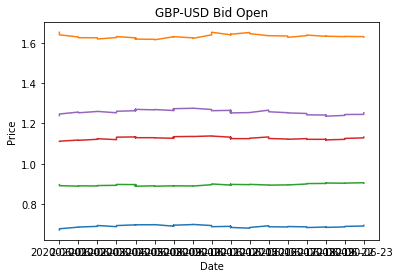

In [120]:
x = dfaudusdse['Date']
y = dfaudusdse['bid_open']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AUD-USD Bid Open')

x = dfeuraudse['Date']
y = dfeuraudse['bid_open']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EUR-AUD Bid Open')

x = dfeurgbpse['Date']
y = dfeurgbpse['bid_open']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EUR-GBP Bid Open')

x = dfeurusdse['Date']
y = dfeurusdse['bid_open']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('EUR-USD Bid Open')

x = dfgbpusdse['Date']
y = dfgbpusdse['bid_open']
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GBP-USD Bid Open')

### Determine if stationary

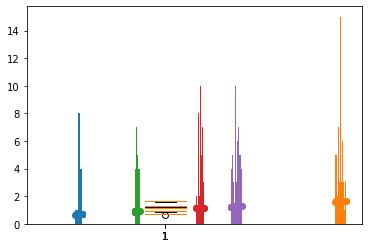

In [121]:
#rolling mean and std plot
x = dfaudusdse['bid_open']
y = dfaudusdse['ask_open']
plt.hist(x)
plt.boxplot(x)
plt.scatter(x,y)

x = dfeuraudse['bid_open']
y = dfeuraudse['ask_open']
plt.hist(x)
plt.boxplot(x)
plt.scatter(x,y)

x = dfeurgbpse['bid_open']
y = dfeurgbpse['ask_open']
plt.hist(x)
plt.boxplot(x)
plt.scatter(x,y)

x = dfeurusdse['bid_open']
y = dfeurusdse['ask_open']
plt.hist(x)
plt.boxplot(x)
plt.scatter(x,y)

x = dfgbpusdse['bid_open']
y = dfgbpusdse['ask_open']
plt.hist(x)
plt.boxplot(x)
plt.scatter(x,y)

array([[<AxesSubplot:xlabel='bid_open', ylabel='bid_open'>,
        <AxesSubplot:xlabel='bid_high', ylabel='bid_open'>,
        <AxesSubplot:xlabel='bid_low', ylabel='bid_open'>,
        <AxesSubplot:xlabel='bid_close', ylabel='bid_open'>,
        <AxesSubplot:xlabel='ask_open', ylabel='bid_open'>,
        <AxesSubplot:xlabel='ask_high', ylabel='bid_open'>,
        <AxesSubplot:xlabel='ask_low', ylabel='bid_open'>,
        <AxesSubplot:xlabel='ask_close', ylabel='bid_open'>],
       [<AxesSubplot:xlabel='bid_open', ylabel='bid_high'>,
        <AxesSubplot:xlabel='bid_high', ylabel='bid_high'>,
        <AxesSubplot:xlabel='bid_low', ylabel='bid_high'>,
        <AxesSubplot:xlabel='bid_close', ylabel='bid_high'>,
        <AxesSubplot:xlabel='ask_open', ylabel='bid_high'>,
        <AxesSubplot:xlabel='ask_high', ylabel='bid_high'>,
        <AxesSubplot:xlabel='ask_low', ylabel='bid_high'>,
        <AxesSubplot:xlabel='ask_close', ylabel='bid_high'>],
       [<AxesSubplot:xlabel='bid_open'

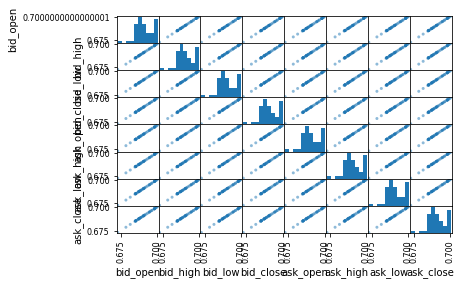

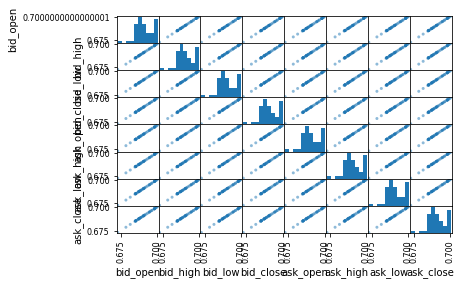

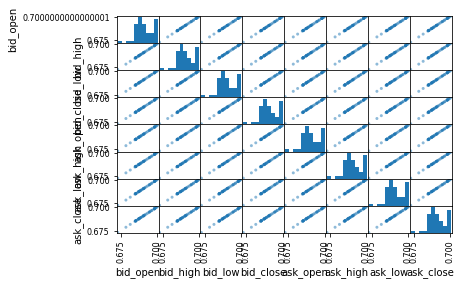

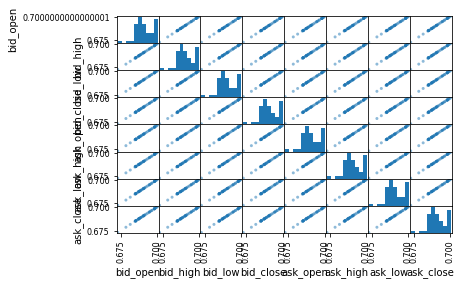

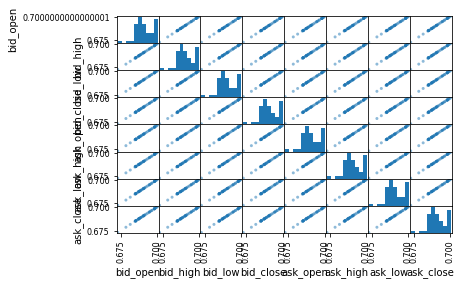

In [122]:
dfaudusdses = dfaudusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
pd.plotting.scatter_matrix(dfs)

dfeuraudses = dfeuraudse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
pd.plotting.scatter_matrix(dfs)

dfeurgbpses = dfeurgbpse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
pd.plotting.scatter_matrix(dfs)

dfeurusdses = dfeurusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
pd.plotting.scatter_matrix(dfs)

dfgbpusdses = dfgbpusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
pd.plotting.scatter_matrix(dfs)

In [123]:
dfaudusdse.describe()
dfeuraudse.describe()
dfeurgbpse.describe()
dfeurusdse.describe()
dfgbpusdse.describe()

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.0,48.000000,48.000000,48.000000,48.000000,48.0,48.0,48.0
mean,1.256727,1.256752,1.256709,1.256735,-1.0,-1.0,-1.0,1.256772,1.256794,1.256751,1.256780,-1.0,-1.0,-1.0
std,0.011426,0.011430,0.011431,0.011436,0.0,0.0,0.0,0.011427,0.011432,0.011432,0.011438,0.0,0.0,0.0
min,1.235980,1.236020,1.235980,1.235990,-1.0,-1.0,-1.0,1.236020,1.236050,1.236020,1.236040,-1.0,-1.0,-1.0
25%,1.248925,1.248947,1.248925,1.248937,-1.0,-1.0,-1.0,1.248952,1.248975,1.248937,1.248965,-1.0,-1.0,-1.0
50%,1.257400,1.257475,1.257400,1.257465,-1.0,-1.0,-1.0,1.257440,1.257515,1.257425,1.257485,-1.0,-1.0,-1.0
75%,1.264940,1.264960,1.264920,1.264960,-1.0,-1.0,-1.0,1.264980,1.264980,1.264980,1.264980,-1.0,-1.0,-1.0
max,1.275690,1.275730,1.275670,1.275720,-1.0,-1.0,-1.0,1.275730,1.275770,1.275710,1.275770,-1.0,-1.0,-1.0


In [124]:
resultaudusd = adfuller(dfaudusdse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resulteuraud = adfuller(dfeuraudse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resulteurgbp = adfuller(dfeurgbpse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resulteurusd = adfuller(dfeurusdse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resultgbpusd = adfuller(dfgbpusdse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -2.942453160451172
p-value: 0.04062932508537931
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675
ADF Statistic: -2.942453160451172
p-value: 0.04062932508537931
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675
ADF Statistic: -2.942453160451172
p-value: 0.04062932508537931
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675
ADF Statistic: -2.942453160451172
p-value: 0.04062932508537931
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675
ADF Statistic: -2.942453160451172
p-value: 0.04062932508537931
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675


## ARIMA model 

In [71]:
dft['bid_open']

36000    0.67288
57600    0.67849
36000    0.68663
57600    0.68716
36000    0.69044
57600    0.69479
36000    0.68891
57600    0.69437
36000    0.69790
57600    0.69811
36000    0.69790
57600    0.69811
36000    0.69790
57600    0.69811
36000    0.69864
57600    0.69912
36000    0.69138
57600    0.69625
36000    0.69138
57600    0.69625
36000    0.69934
57600    0.70019
36000    0.69450
57600    0.68877
36000    0.69065
57600    0.68516
36000    0.69065
57600    0.68516
36000    0.69065
57600    0.68516
36000    0.68146
57600    0.68510
36000    0.69329
57600    0.68854
36000    0.68755
57600    0.68963
36000    0.68801
57600    0.68464
36000    0.68732
57600    0.68541
36000    0.68732
57600    0.68541
36000    0.68732
57600    0.68541
36000    0.68781
57600    0.69022
36000    0.69236
57600    0.69528
Name: bid_open, dtype: float64

In [105]:
df_open = dft[['date', 'bid_open']]
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
del df_open['date']
df_open.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_21976\2505757371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['date'] = pd.to_datetime(df_open['date'])


,bid_open
date,
2020-06-01 10:00:00+00:00,0.67288
2020-06-01 16:00:00+00:00,0.67849
2020-06-02 10:00:00+00:00,0.68663
2020-06-02 16:00:00+00:00,0.68716
2020-06-03 10:00:00+00:00,0.69044


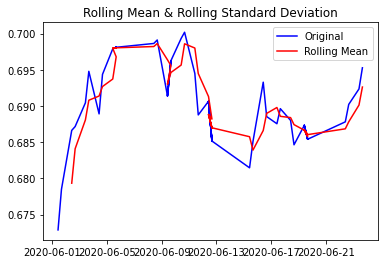

In [106]:
rolling_mean = df_open.rolling(window=3).mean()
rolling_std = df_open.rolling(window = 3).std()

plt.plot(df_open, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


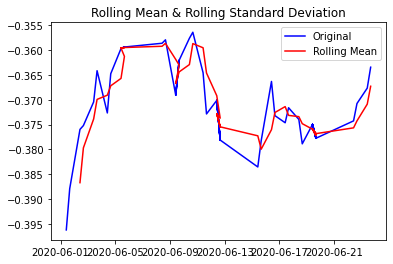

In [107]:
df_log = np.log(df_open)
rolling_mean = df_log.rolling(window = 3).mean()
rolling_std = df_log.rolling(window = 3).std()

plt.plot(df_log, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [108]:
decomposition = seasonal_decompose(df_open) 
model = ARIMA(df_open, order=(-8,1,8))
results = model.fit()#disp=-1
df_shift = df_open - df_open.shift()
plt.plot(df_shift)
plt.plot(results.fittedvalues, color='red')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

## Supervised learning model

In [ ]:
# stepwise backward model --- all variables --- determine which features are most important:

## Model Evaluation -- phase 

In [35]:
#grab values
X = df.iloc[:,:]
y = df.iloc[[:,:]]

SyntaxError: invalid syntax (326095641.py, line 3)

In [ ]:
#scale the data if necessary

In [ ]:
#training - due to numeric we can split the following way 
#note wise to keep months together within the split
#Train, Test and validation - two splits . Train -> test/validation then validation -> test
X_train, X_test, y_train, y_test = pd.train_test_split(X, y, test_size=0.3)